***PREDICTING DEFAULT PAYMENTS WITH BANK TRANSACTIONS***

*FIRST OF ALL, WE WILL DRAW SOME GRAPHICS TO KNOW WHICH FEATURES WE WLL STUDY*

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read the CSV with all data**

In [9]:
fd = pd.read_csv('Dataset.csv')

In [11]:
fd.head()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,2
0,1,20000.0,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,2,120000.0,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,3,90000.0,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,1
3,4,50000.0,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,1
4,5,50000.0,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0


In [4]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

**Check if there are NaN cells**

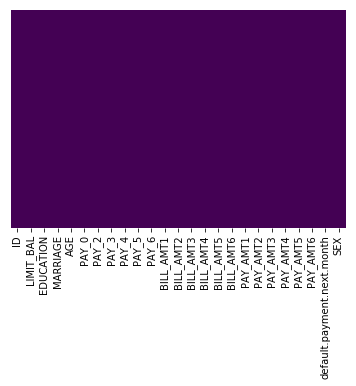

In [6]:
sns.heatmap(fd.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**We apply a transformation on SEX column cause we want it binary (0,1)**

In [10]:
sex = pd.get_dummies(fd['SEX'], drop_first=True)
fd.drop('SEX',axis=1,inplace=True)
fd = pd.concat([fd,sex],axis=1)
fd = fd.rename(index=str, columns={1: 'SEX'})

**We apply a transformation on MARRIAGE column cause we want it binary (0,1)**

In [7]:
sex = pd.get_dummies(fd['MARRIAGE'], drop_first=True)
fd.drop('MARRIAGE',axis=1,inplace=True)
fd = pd.concat([fd,sex],axis=1)
fd = fd.rename(index=str, columns={2: 'MARRIAGE'})

**LET'S SEE COME COUNTPLOTS TO SEE HOW DATA EVOLVES**

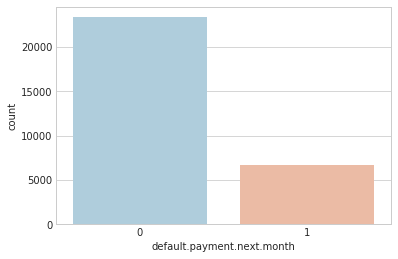

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='default.payment.next.month',data=fd,palette='RdBu_r')

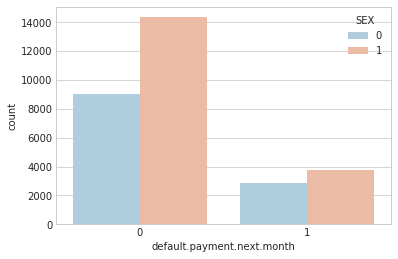

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='default.payment.next.month',hue='SEX',data=fd,palette='RdBu_r')

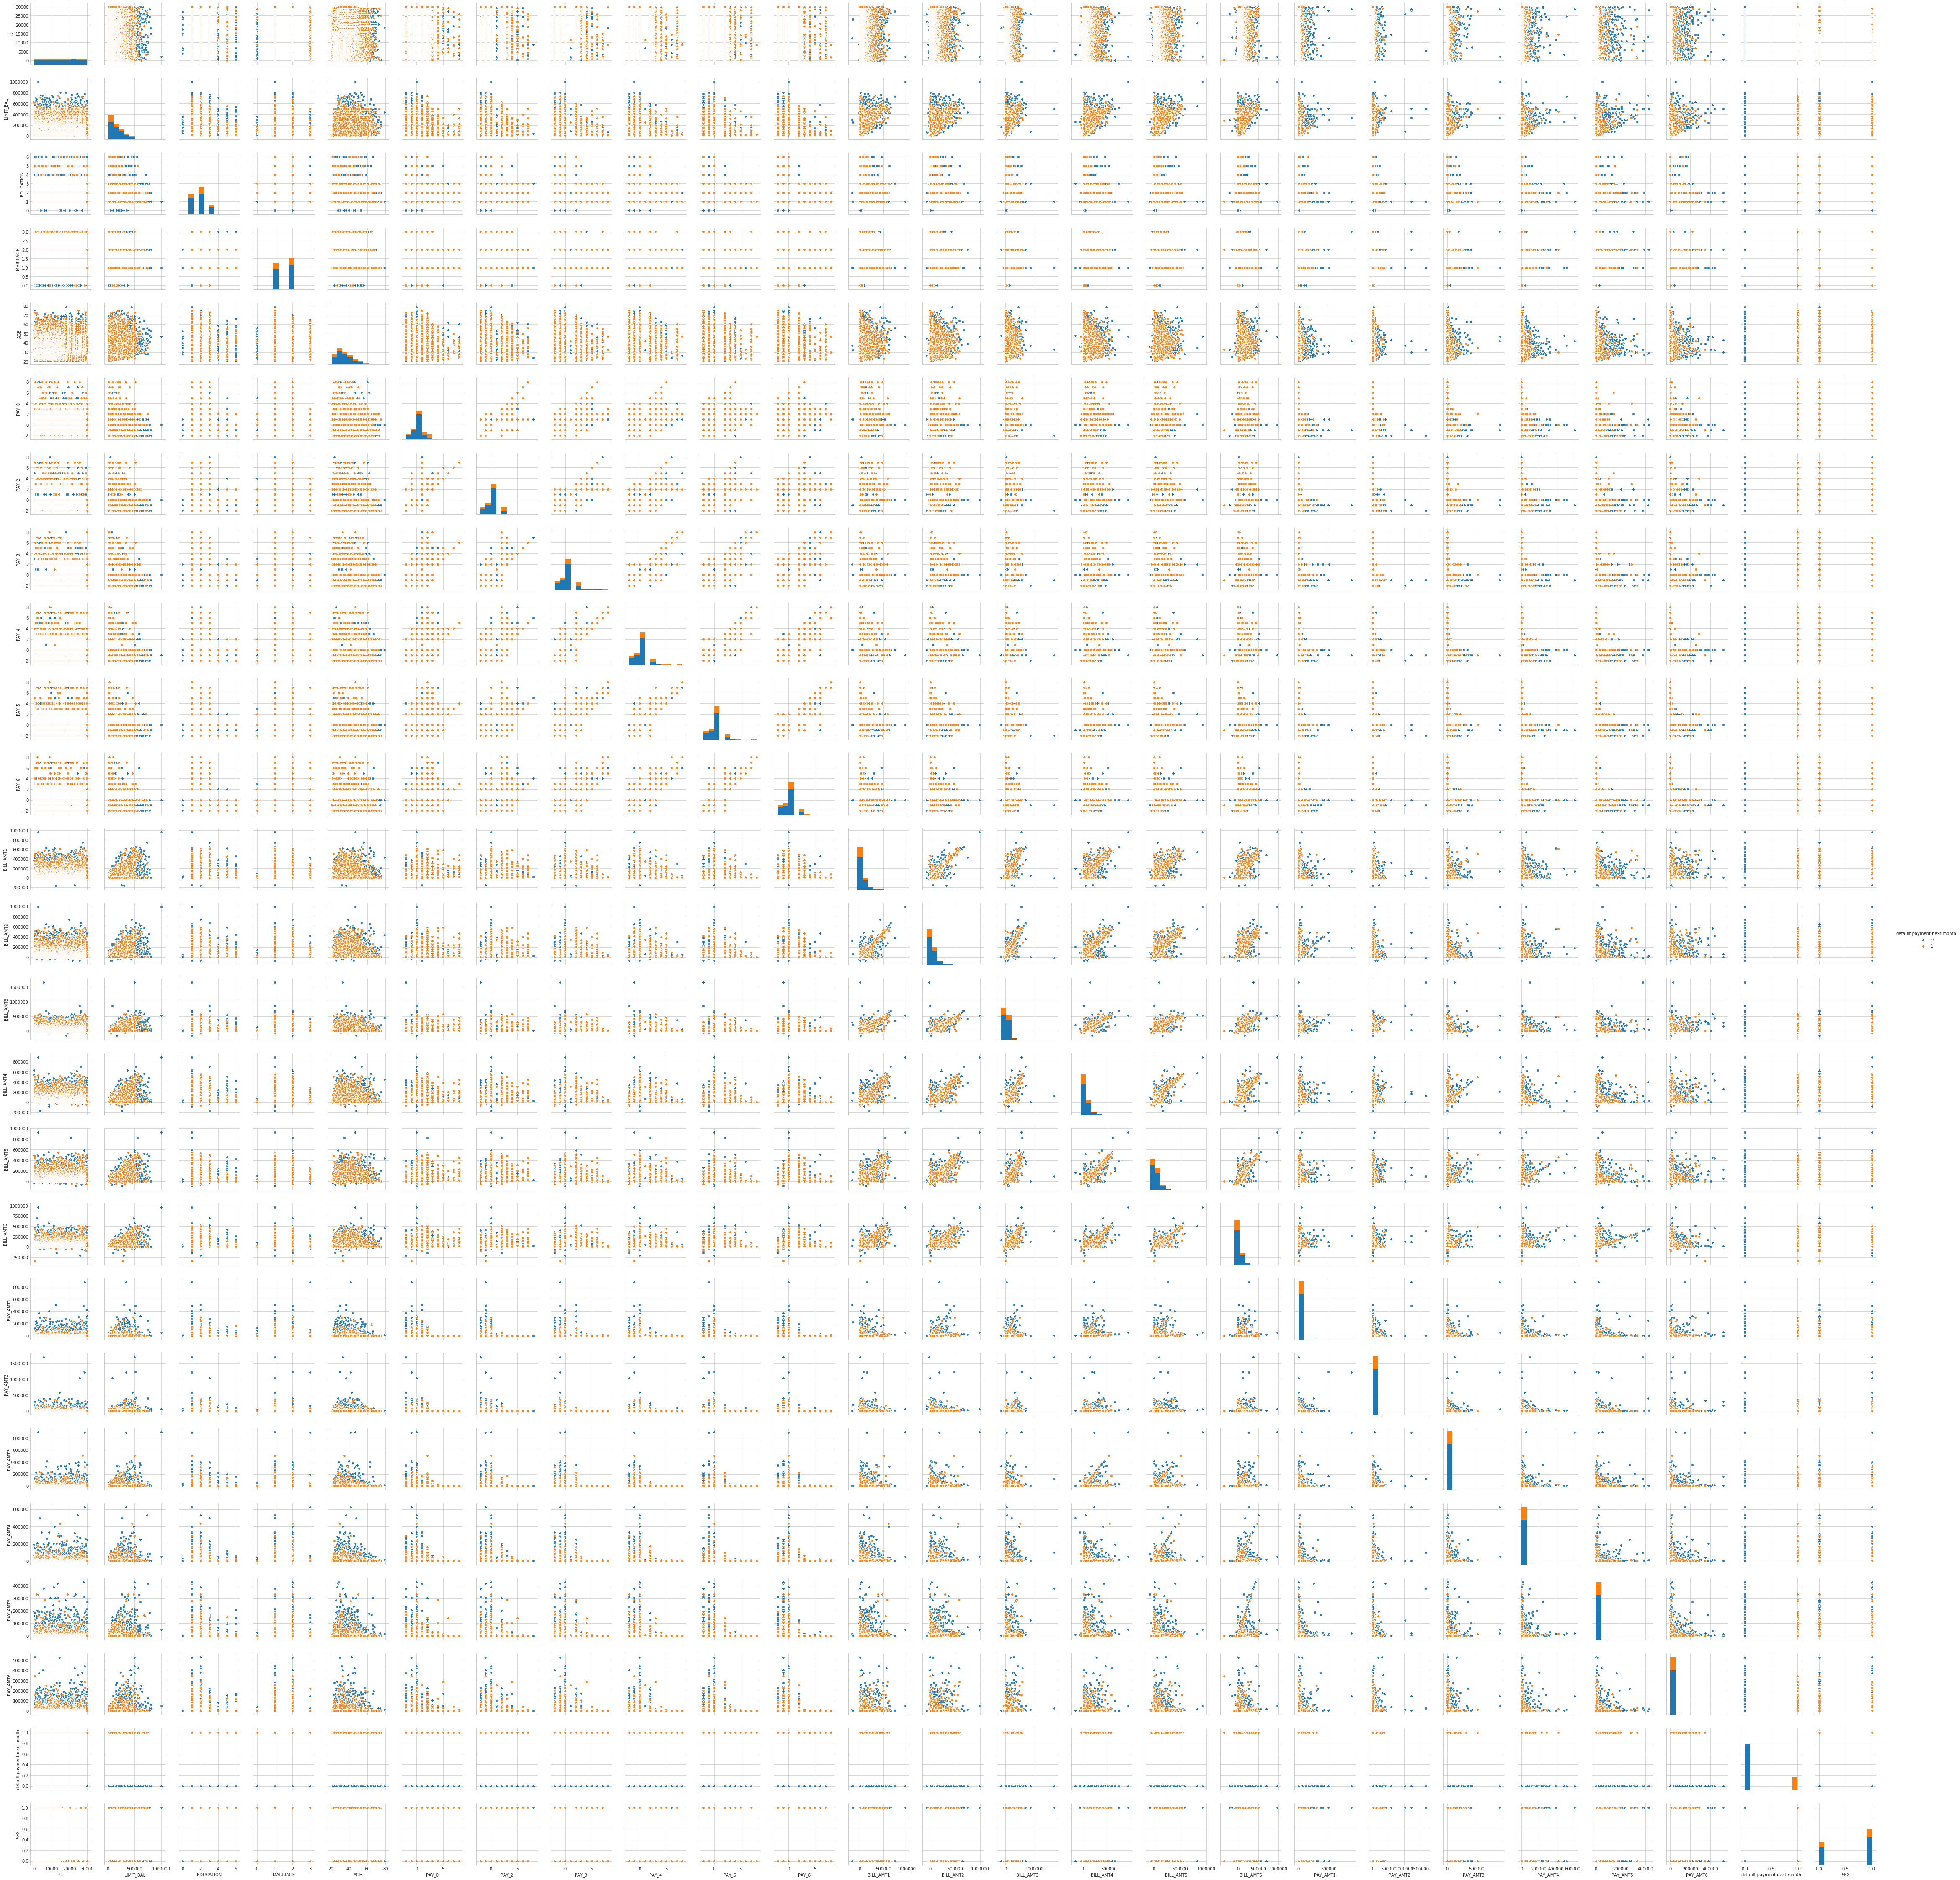

In [10]:
sns.pairplot(fd,hue ='default.payment.next.month')

In pairplot we can see different "square zones" that is because we are doing plots of similar datas, like PAY_1 with BILL_ATM_x (x between 1 and 6).

When we do a plot with PAY_x, BILL_ATMx and PAY_ATMx, x must be the same or the plot don't give as true information.